In [66]:
import pandas as pd
df = pd.read_csv("cities_by_day.csv",parse_dates=["Date"])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  C6H6        23908 non-null  float64       
 12  C7H8        21490 non-null  float64       
 13  C8H10       11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [68]:
initial_length = len(df)
print(initial_length)

29531


In [69]:
df_column = df.columns

In [70]:
for name in df_column:
    print("{} has null value = {} % ".format(name,int(round((df[name].isnull().sum())/len(df),2)*100)))

City has null value = 0 % 
Date has null value = 0 % 
PM2.5 has null value = 16 % 
PM10 has null value = 38 % 
NO has null value = 12 % 
NO2 has null value = 12 % 
NOx has null value = 14 % 
NH3 has null value = 35 % 
CO has null value = 7 % 
SO2 has null value = 13 % 
O3 has null value = 14 % 
C6H6 has null value = 19 % 
C7H8 has null value = 27 % 
C8H10 has null value = 61 % 
AQI has null value = 16 % 
AQI_Bucket has null value = 16 % 


<AxesSubplot:>

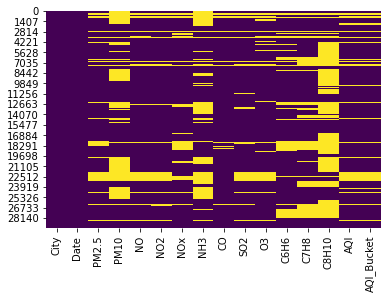

In [71]:
import seaborn as sns
sns.heatmap(df.isnull(),cmap="viridis",cbar=False)

In [72]:
# droping C8H10 as it has 61% null values
df = df.drop("C8H10",axis=1)

In [73]:
df["AQI_Bucket"] = df["AQI_Bucket"].astype("category")

df = df[df["AQI_Bucket"].notnull()]

print(df.head())


         City       Date   PM2.5  PM10     NO    NO2    NOx  NH3     CO  \
28  Ahmedabad 2015-01-29   83.13   NaN   6.93  28.71  33.72  NaN   6.93   
29  Ahmedabad 2015-01-30   79.84   NaN  13.85  28.68  41.08  NaN  13.85   
30  Ahmedabad 2015-01-31   94.52   NaN  24.39  32.66  52.61  NaN  24.39   
31  Ahmedabad 2015-02-01  135.99   NaN  43.48  42.08  84.57  NaN  43.48   
32  Ahmedabad 2015-02-02  178.33   NaN  54.56  35.31  72.80  NaN  54.56   

      SO2      O3  C6H6  C7H8    AQI AQI_Bucket  
28  49.52   59.76  0.02  0.00  209.0       Poor  
29  48.49   97.07  0.04  0.00  328.0  Very Poor  
30  67.39  111.33  0.24  0.01  514.0     Severe  
31  75.23  102.70  0.40  0.04  782.0     Severe  
32  55.04  107.38  0.46  0.06  914.0     Severe  


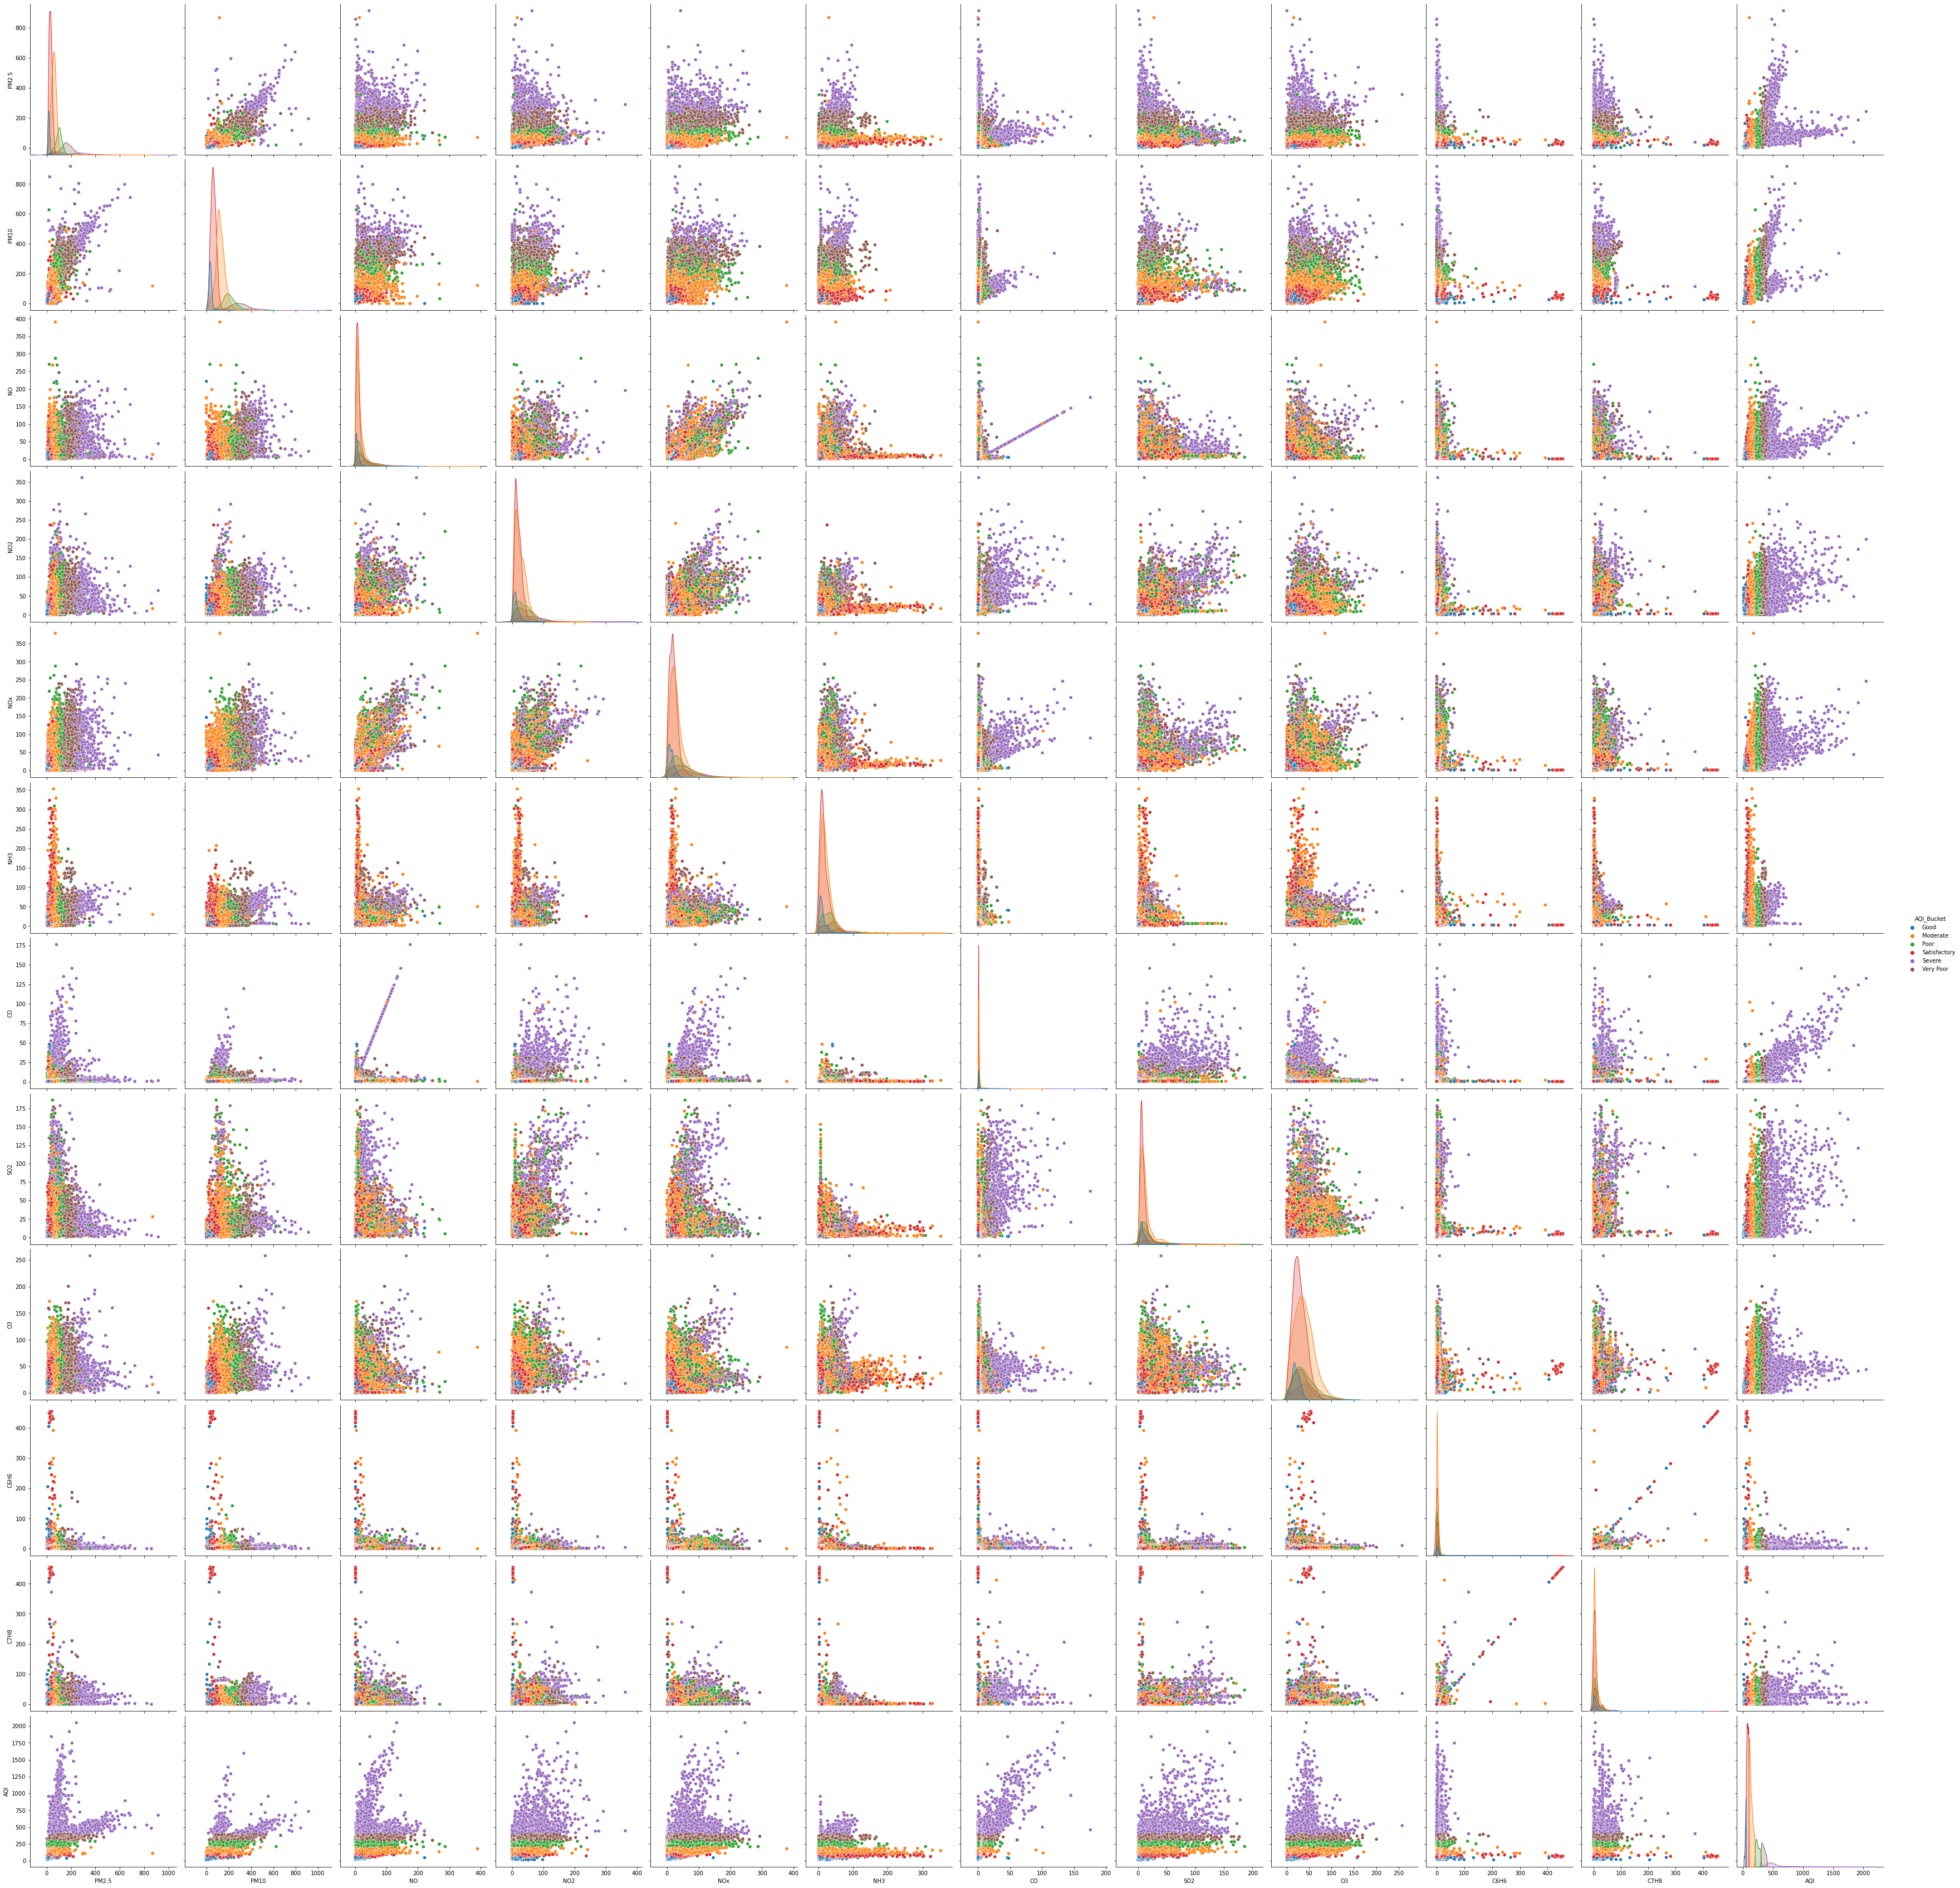

In [50]:
# plotting pairwise relationship between dataset
sns.pairplot(df,hue="AQI_Bucket",height=4)

<AxesSubplot:>

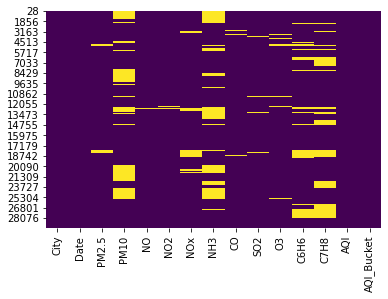

In [75]:
sns.heatmap(df.isnull(),cmap="viridis",cbar=False)

In [76]:
# Extracting year month day from each records
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [77]:
# Filling missing value with 0
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'C6H6', 'C7H8']
for c in col:
    df[c].fillna((df[c].mean()),inplace=True)


In [78]:
# feature Engineering
# clubbing all particular matter
df["PM"] = df["PM2.5"] + df["PM10"]
# clubbing nitric oxide
df["Nitric"] = df["NO"]+df["NO2"]+df["NOx"]


In [79]:
# setting index of dataframe to date

df.set_index(df["Date"],drop=True,inplace=True)

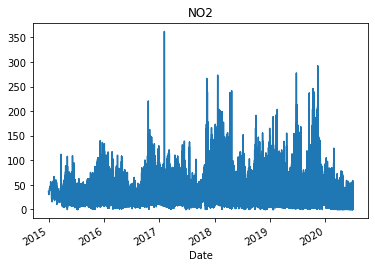

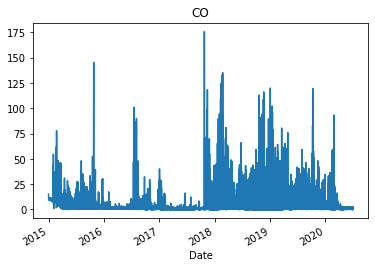

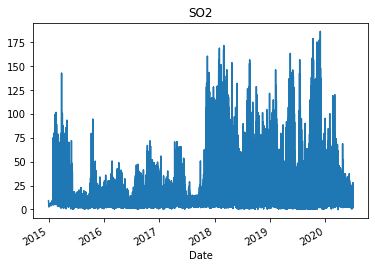

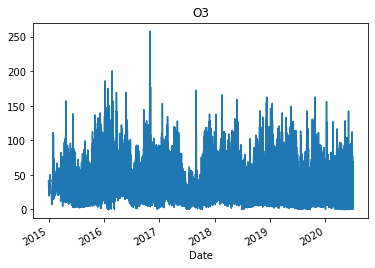

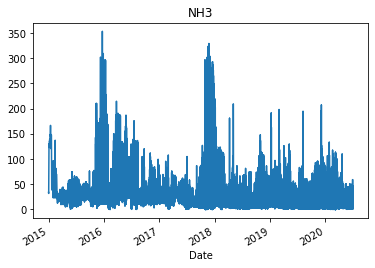

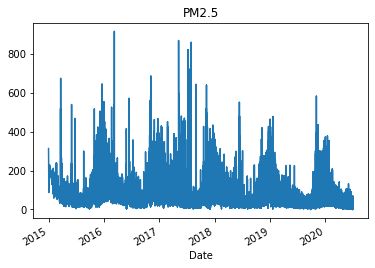

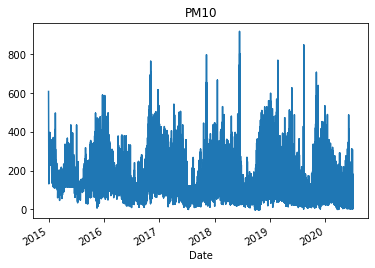

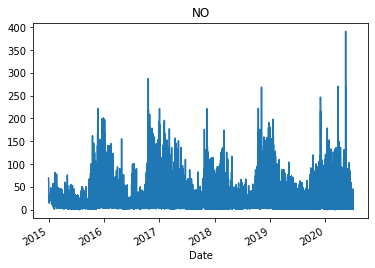

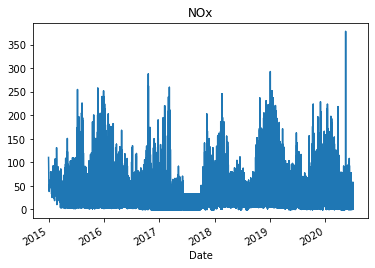

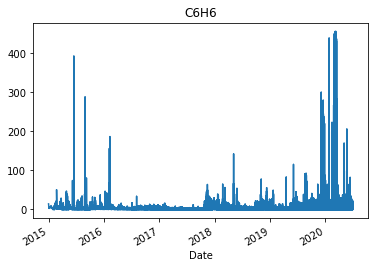

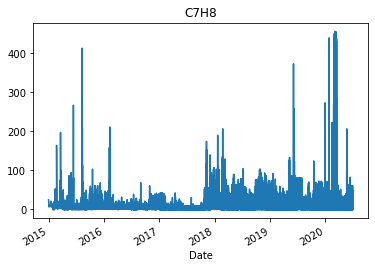

In [80]:
# vizualizing seasonality, trend ,noise in data
import matplotlib.pyplot as plt
gases = ["NO2","CO","SO2","O3","NH3","PM2.5","PM10","NO","NOx","C6H6","C7H8"]
for gas in gases:
    df[gas].plot()
    plt.title(gas)
    plt.show()

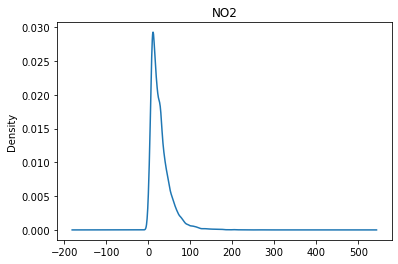

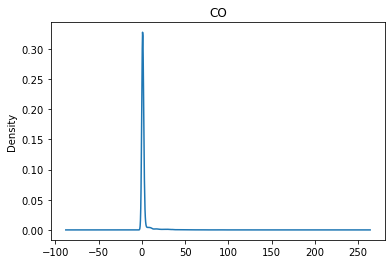

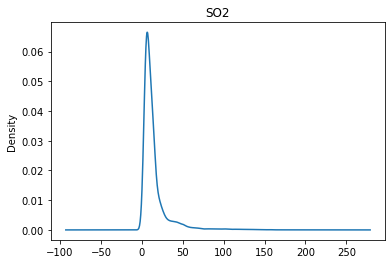

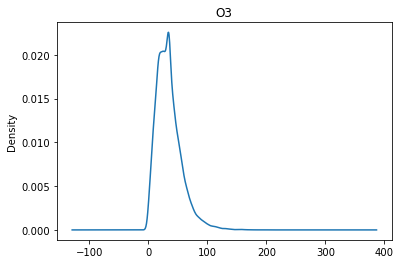

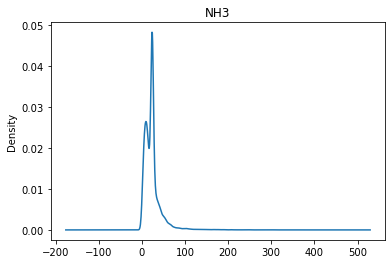

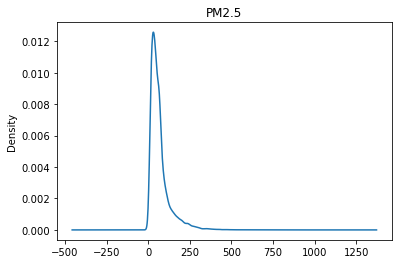

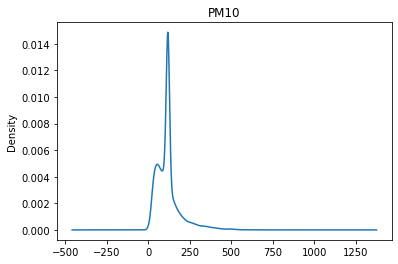

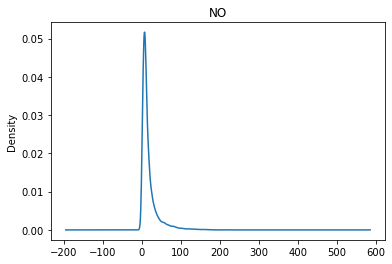

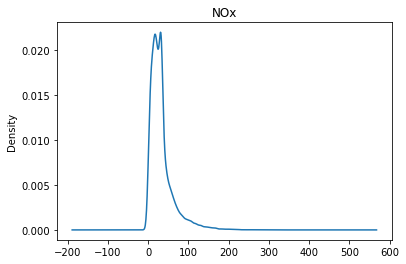

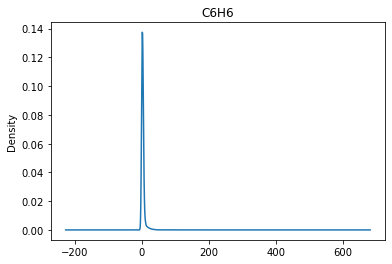

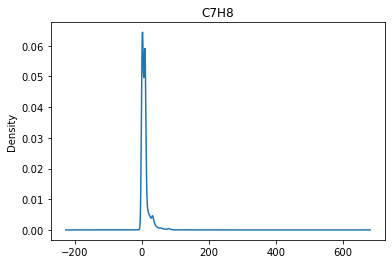

In [58]:
#chechking if data is normally distributed or not
gases = ["NO2","CO","SO2","O3","NH3","PM2.5","PM10","NO","NOx","C6H6","C7H8"]
for gas in gases:
    df[gas].plot(kind='kde')
    plt.title(gas)
    plt.show()

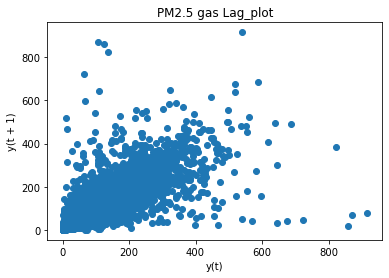

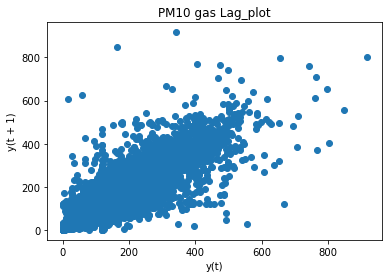

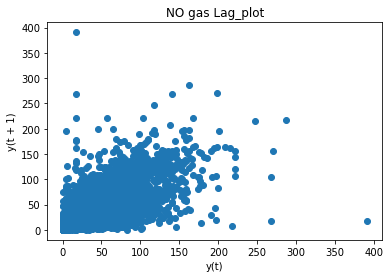

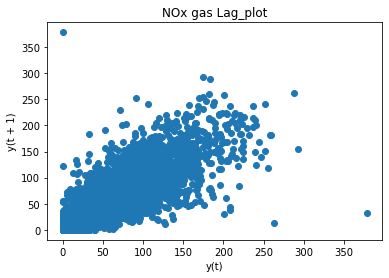

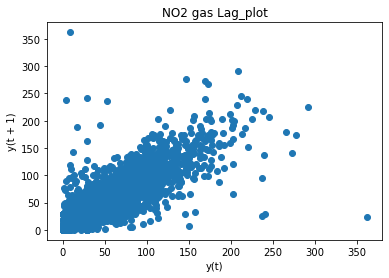

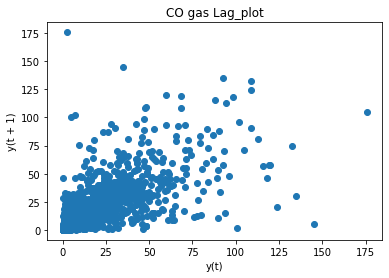

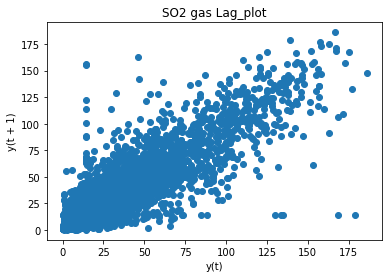

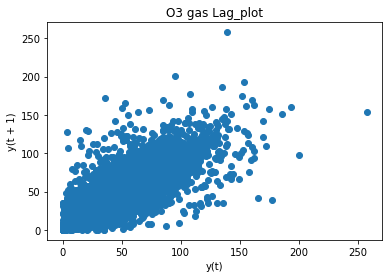

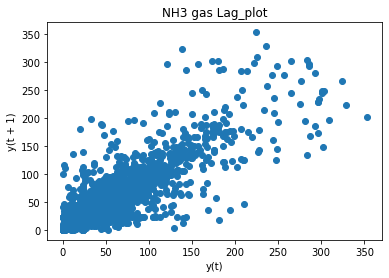

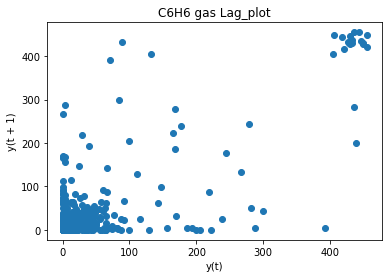

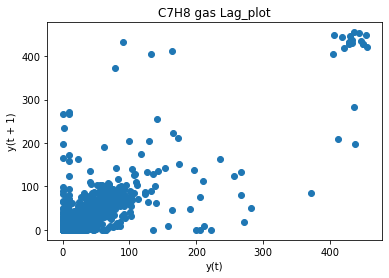

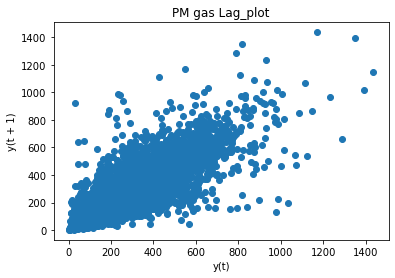

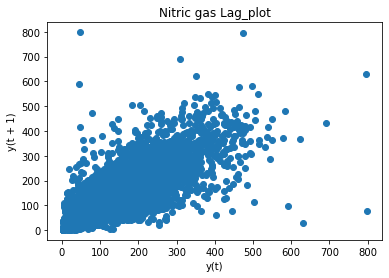

In [82]:
# vizualizing lag plot
from pandas.plotting import lag_plot
gases = ["PM2.5","PM10","NO","NOx","NO2","CO","SO2","O3","NH3","C6H6","C7H8","PM","Nitric"]
for gas in gases:
    plt.title("{} gas Lag_plot".format(gas))
    lag_plot(df[gas])
    plt.show()

<AxesSubplot:>

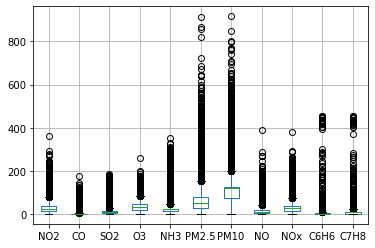

In [59]:
# vizualising outliers
df.boxplot(column=["NO2","CO","SO2","O3","NH3","PM2.5","PM10","NO","NOx","C6H6","C7H8"])

In [60]:
# AQI_Bucket yearly analysis
year_aqi_bucket=df.groupby(["Year","AQI_Bucket"])["AQI_Bucket"].count()
year_aqi_bucket= pd.DataFrame(year_aqi_bucket)
year_aqi_bucket.columns = ["AQI_Bucket Count"]
year_aqi_bucket.reset_index(inplace=True)
year_aqi_bucket

Year    AQI_Bucket  AQI_Bucket Count
0   2015          Good                27
1   2015      Moderate               756
2   2015          Poor               326
3   2015  Satisfactory               278
4   2015        Severe               145
5   2015     Very Poor               295
6   2016          Good                80
7   2016      Moderate              1040
8   2016          Poor               388
9   2016  Satisfactory               494
10  2016        Severe               216
11  2016     Very Poor               355
12  2017          Good               110
13  2017      Moderate               956
14  2017          Poor               378
15  2017  Satisfactory              1101
16  2017        Severe               185
17  2017     Very Poor               504
18  2018          Good               183
19  2018      Moderate              2102
20  2018          Poor               648
21  2018  Satisfactory              1825
22  2018        Severe               409
23  2018     Very Poor               557
24  2019          Good               412
25  2019      Moderate              2490
26  2019          Poor               754
27  2019  Satisfactory              2578
28  2019        Severe               345
29  2019     Very Poor               492
30  2020          Good               529
31  2020      Moderate              1485
32  2020          Poor               287
33  2020  Satisfactory              1948
34  2020        Severe                38
35  2020     Very Poor               134

In [61]:
year_aqi_bucket_pivot = year_aqi_bucket.pivot_table(index="AQI_Bucket",columns="Year",values="AQI_Bucket Count")
year_aqi_bucket_pivot.fillna(0,inplace=True)

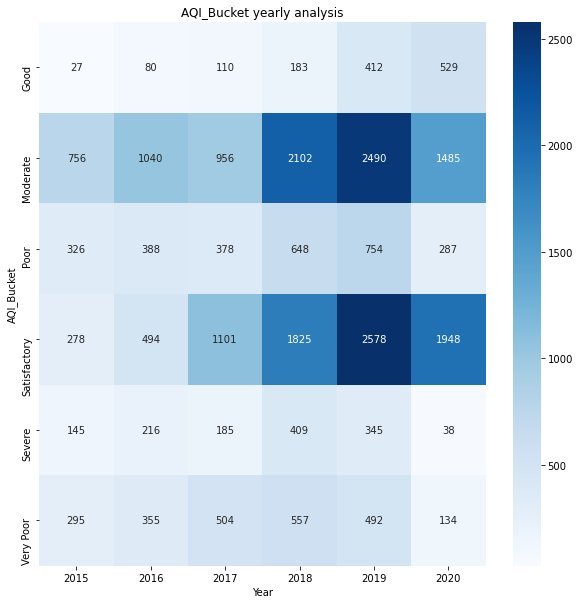

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("AQI_Bucket yearly analysis")
sns.heatmap(year_aqi_bucket_pivot
            ,cmap="Blues",annot=True,fmt="g")
plt.show()

In [63]:
df_temp = df.iloc[:,2:13]
df_temp["PM"] = df["PM"]
df_temp["Nitric"] = df["Nitric"]
df_temp_col=df_temp.columns
df_temp["Year"] = df["Year"]
df_temp["Month"] = df["Month"]


<ipython-input-64-f31ee4c20376>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


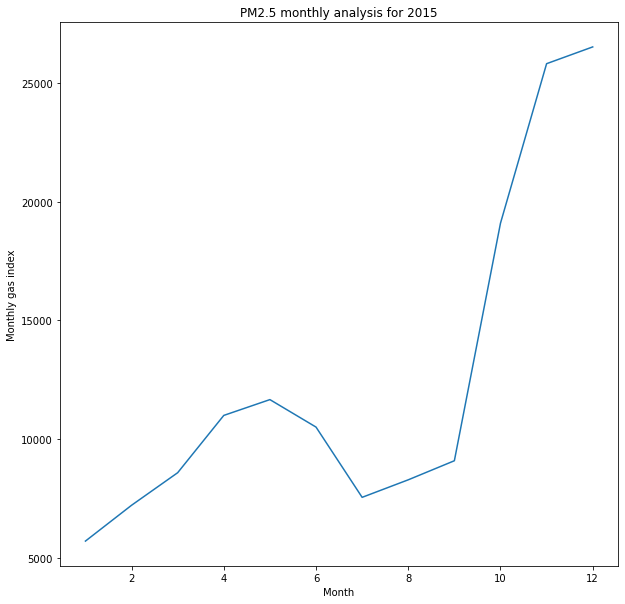

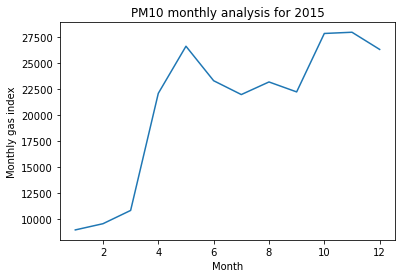

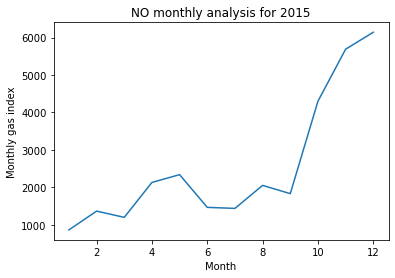

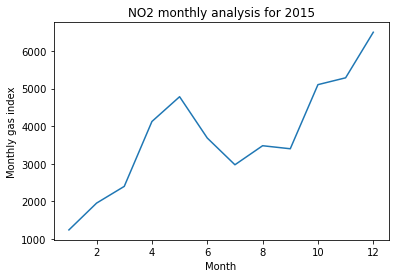

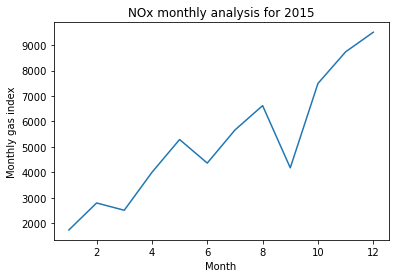

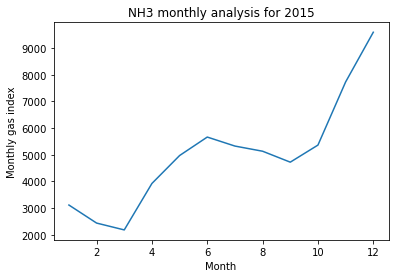

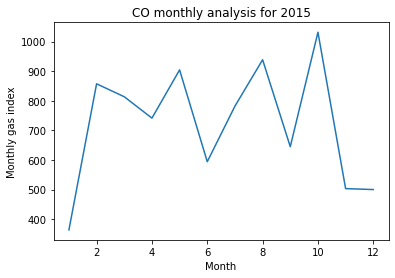

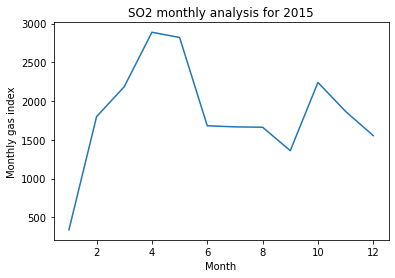

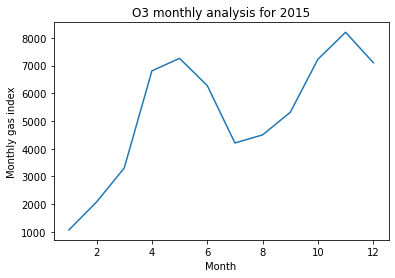

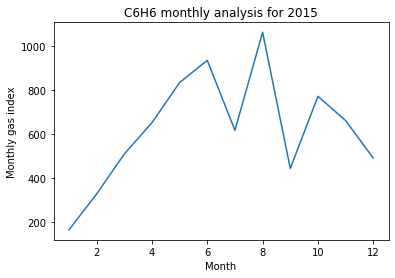

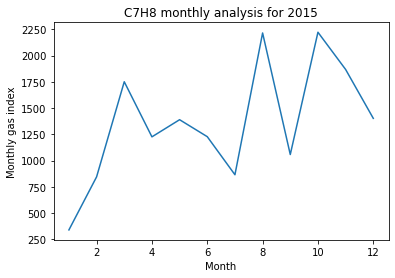

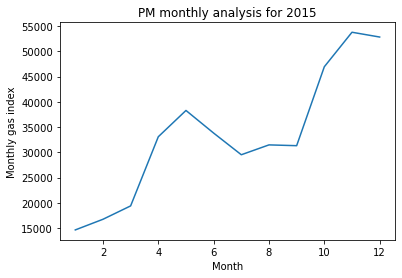

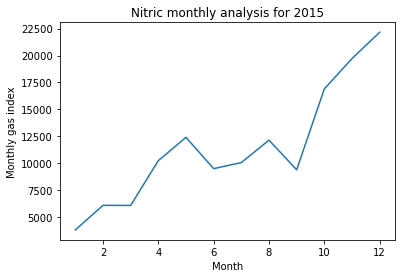

<ipython-input-64-f31ee4c20376>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


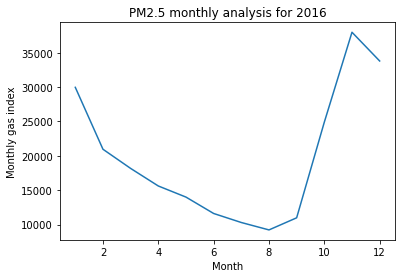

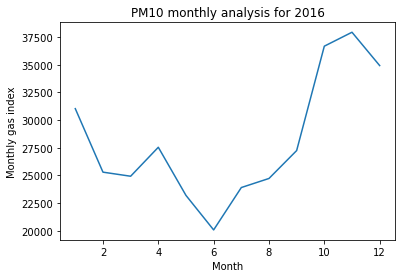

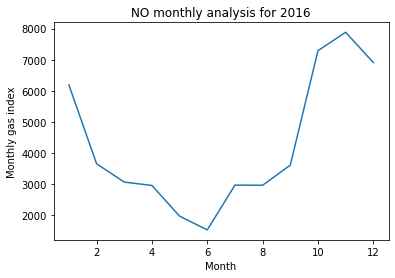

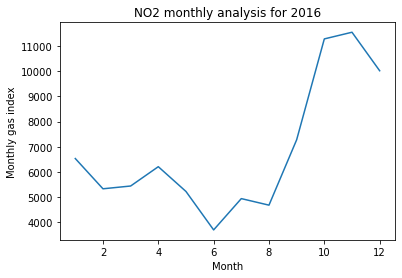

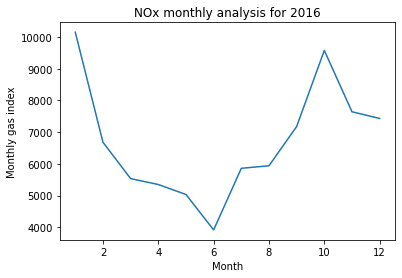

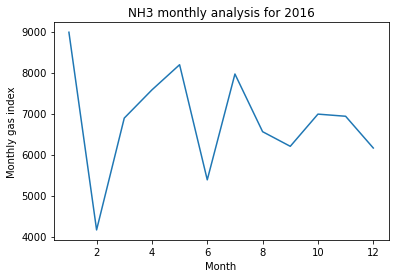

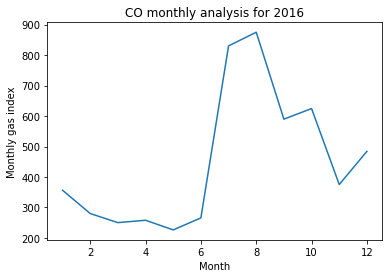

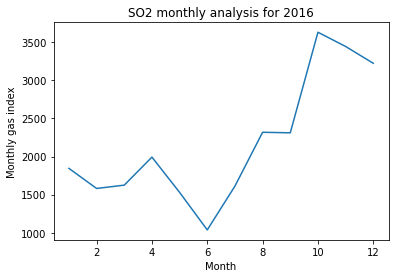

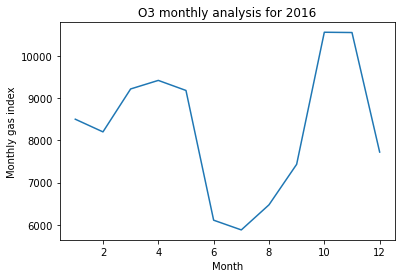

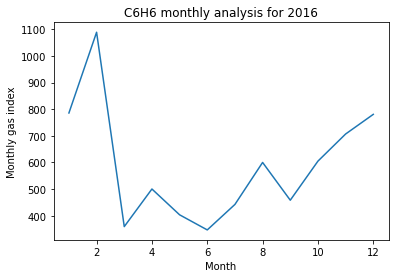

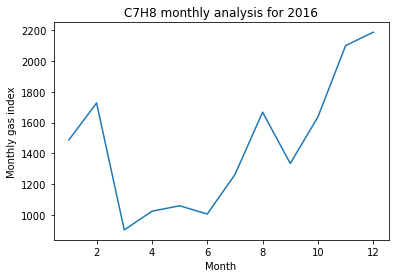

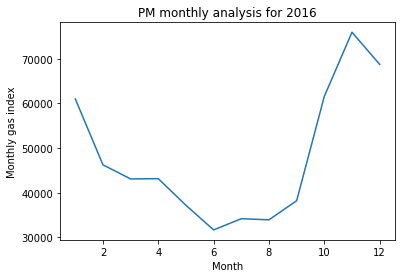

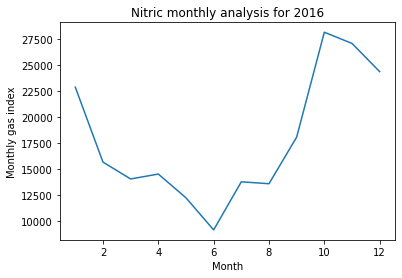

<ipython-input-64-f31ee4c20376>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


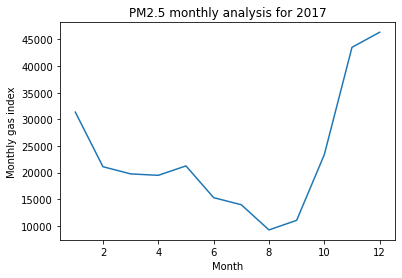

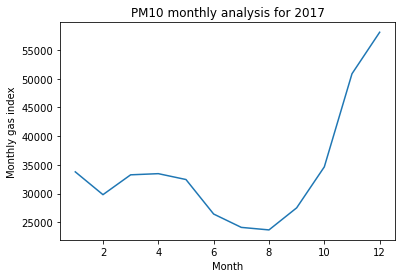

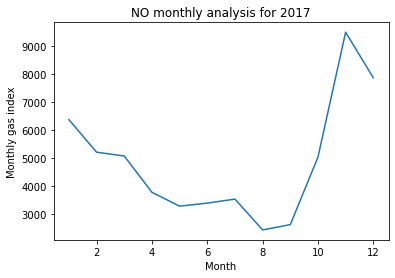

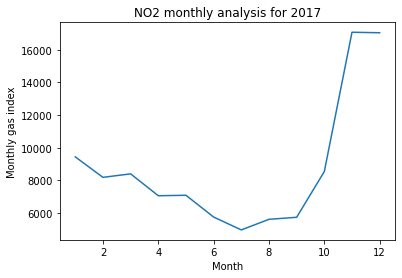

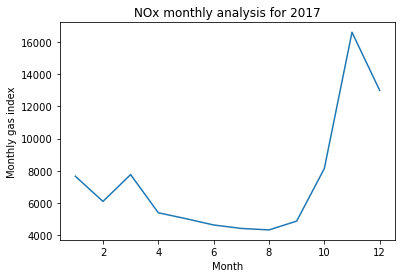

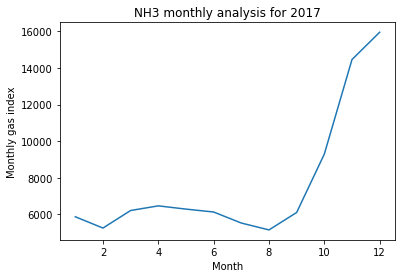

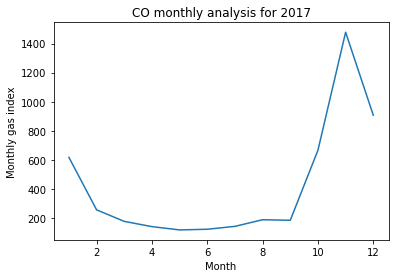

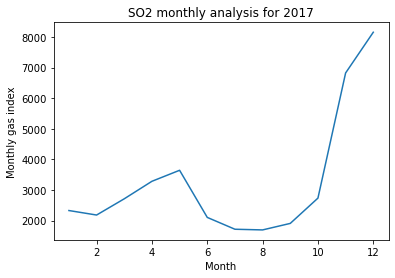

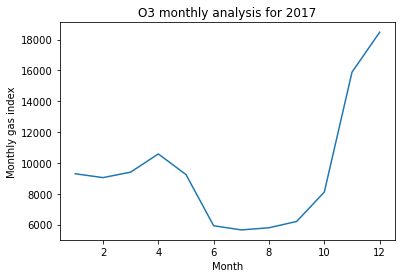

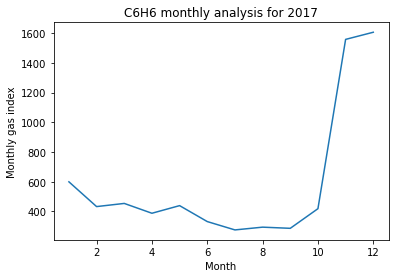

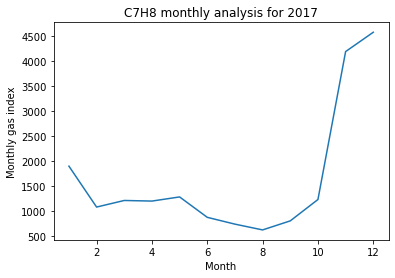

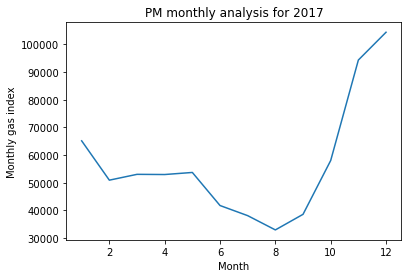

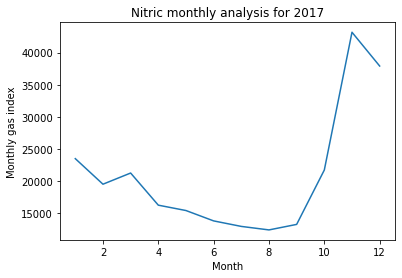

<ipython-input-64-f31ee4c20376>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


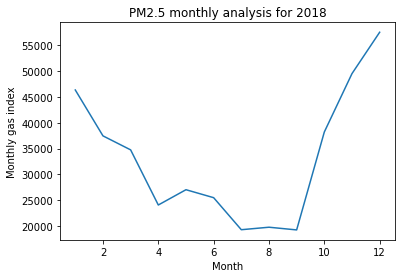

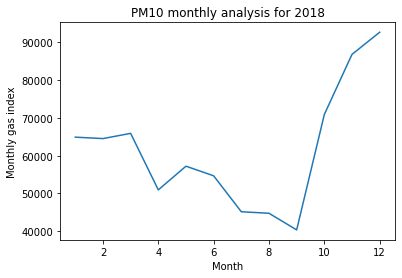

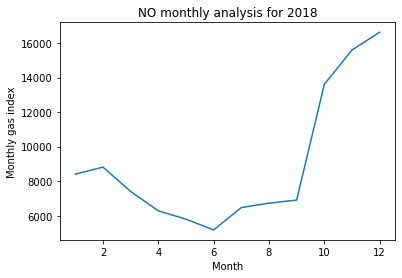

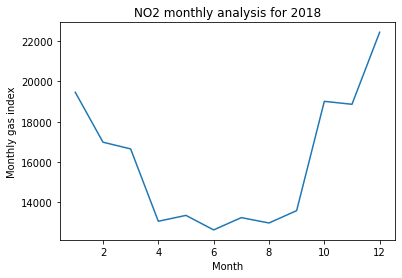

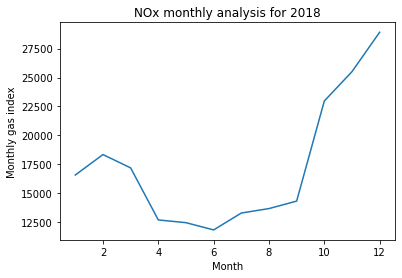

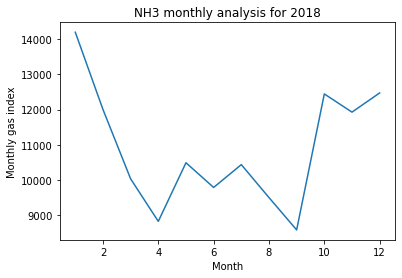

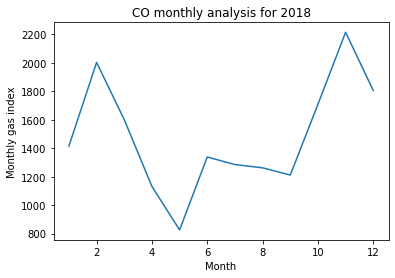

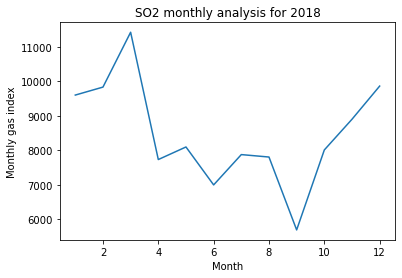

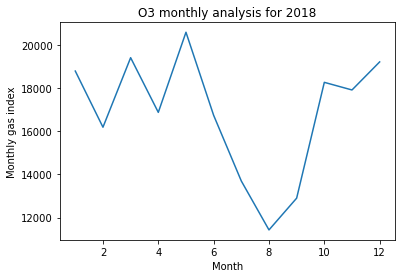

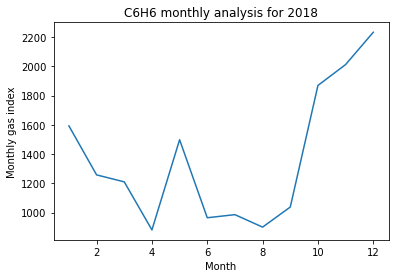

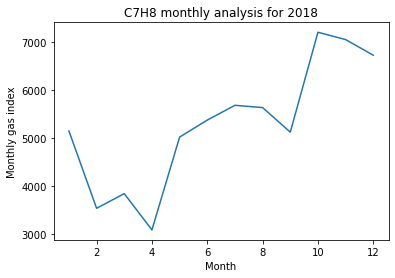

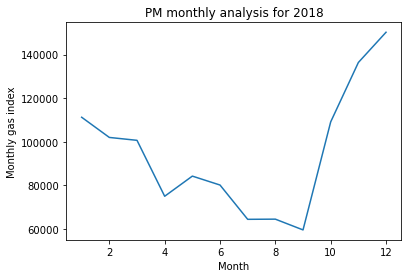

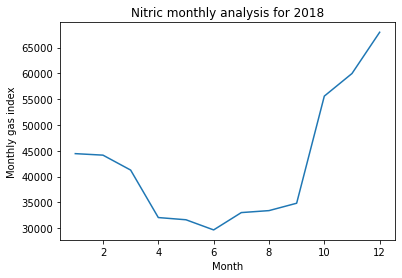

<ipython-input-64-f31ee4c20376>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


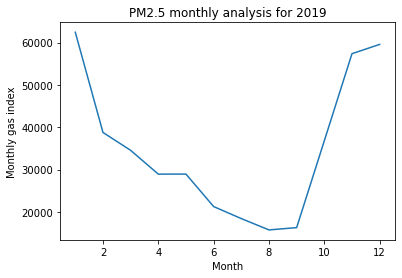

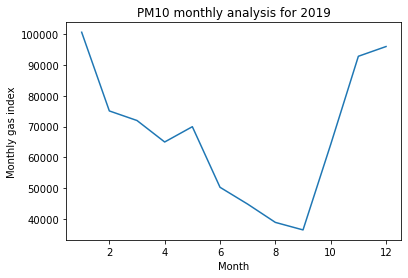

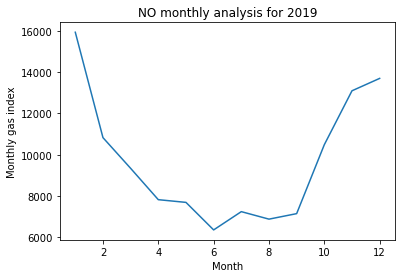

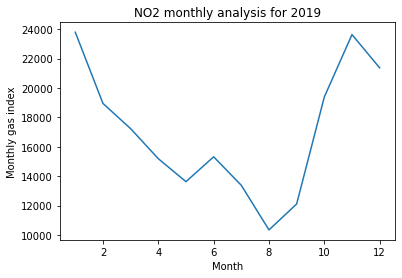

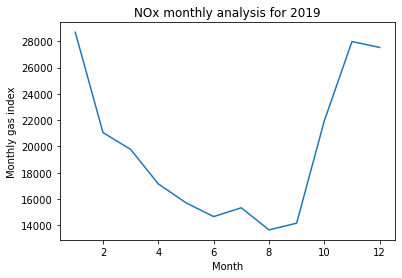

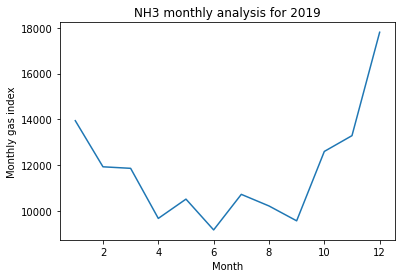

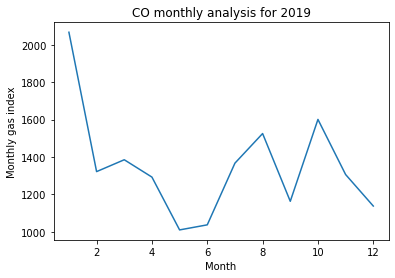

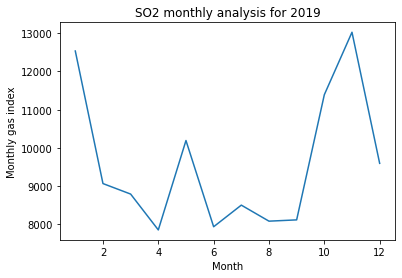

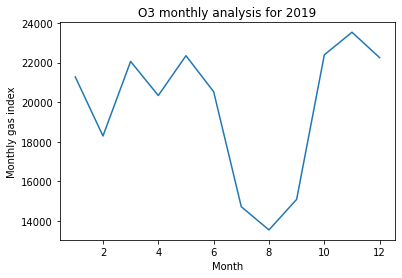

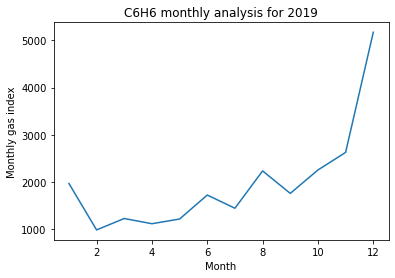

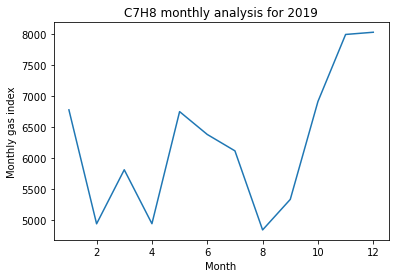

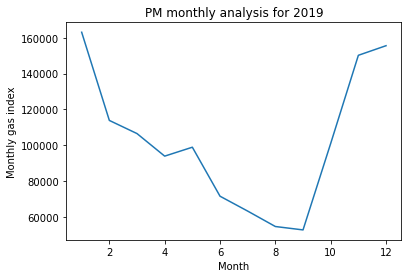

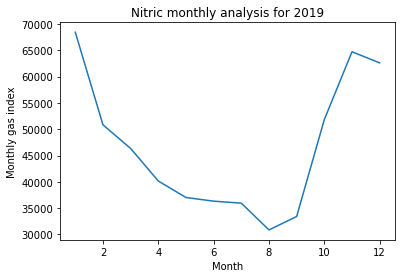

<ipython-input-64-f31ee4c20376>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()


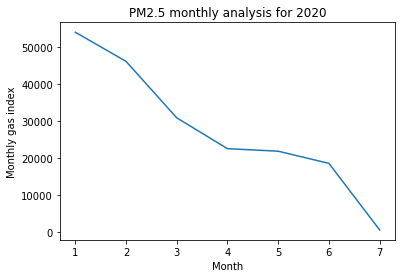

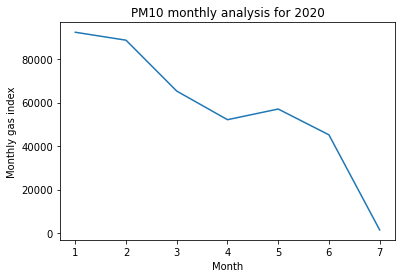

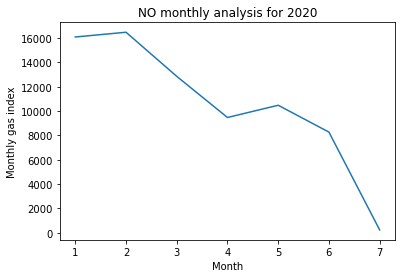

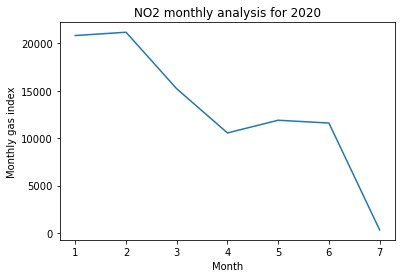

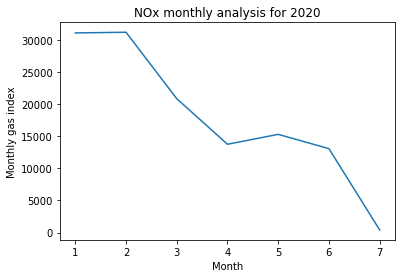

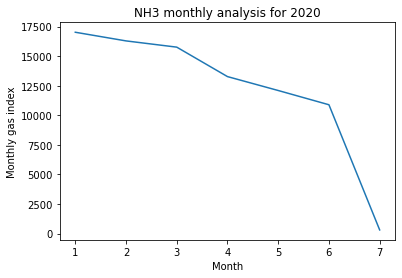

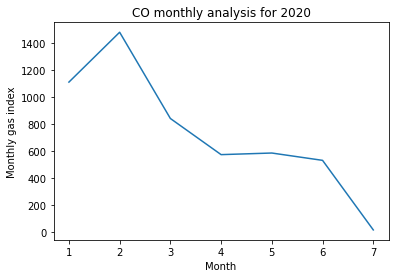

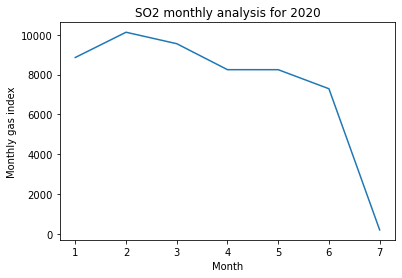

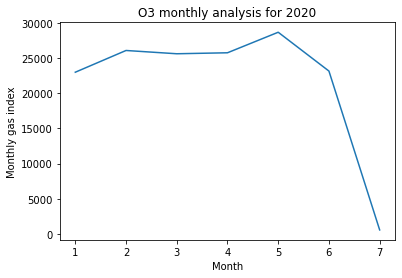

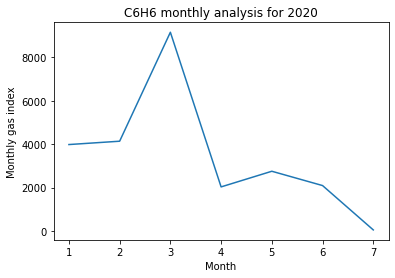

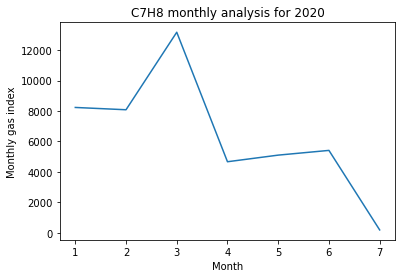

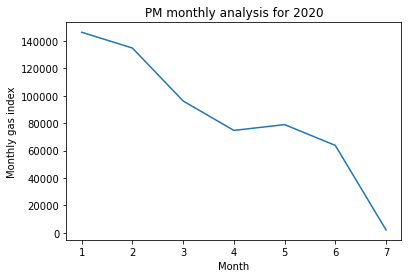

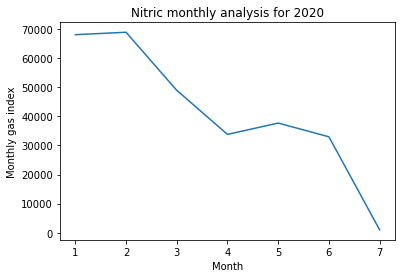

In [64]:
# gases monthly analysis every year
g_m_a= pd.DataFrame(df_temp.groupby(["Year","Month"])[df_temp_col].sum().reset_index())
year = [2015,2016,2017,2018,2019,2020]
fig = plt.figure(figsize=(10,10))
for y in (year):
   
    gma = g_m_a[g_m_a["Year"]==y]
    gma_y = pd.DataFrame(gma.groupby(["Year","Month"])['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric'].sum()).reset_index()
    column = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6', 'C7H8','PM','Nitric']
    for col in column:
        plt.title("{} monthly analysis for {}".format(col,y))
        plt.xlabel("Month")
        
        plt.ylabel("Monthly gas index")
        plt.plot(gma_y["Month"],gma_y[col])
        plt.show()
    

In [83]:
# removing outliers
cols = ["PM2.5","PM10","NO","NOx","NO2","CO","SO2","O3","NH3","C6H6","C7H8","PM","Nitric"]
from scipy.stats import zscore
for col in cols:
    
    df = (df[(zscore(df[col])>-3) & (zscore(df[col])<3)])


In [84]:
from sklearn.model_selection import train_test_split
df_features = df[["NO2","CO","SO2","O3","NH3","PM2.5","PM10"]]
df_labels = df[["AQI","AQI_Bucket"]]
X_train,X_test,Y_train,Y_test = train_test_split(df_features,df_labels,test_size=0.2,random_state=21)

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150, max_depth=None)
rf.fit(X_train,Y_train["AQI"])
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
print(mse(Y_test["AQI"],y_pred))

887.0563201101561


In [103]:
from sklearn.metrics import r2_score
r2_score(Y_test["AQI"],y_pred)

0.8557329152488139

In [104]:
df_pred = pd.DataFrame(y_pred)
df_pred.columns = ["Pred_AQI"]

In [105]:
pred_AQI_Bucket = []
for aqi in df_pred["Pred_AQI"]:
    if aqi>=0 and aqi<=50:
        pred_AQI_Bucket.append("Good")
    elif aqi>=51 and aqi<=100:
        pred_AQI_Bucket.append("Satisfactory")
    elif aqi>=101 and aqi<=200:
        pred_AQI_Bucket.append("Moderate")
    elif aqi>201 and aqi<=300:
        pred_AQI_Bucket.append("Poor")
    elif aqi>301 and aqi<=400:
        pred_AQI_Bucket.append("Very Poor")
    else:
        pred_AQI_Bucket.append("Severe")

In [106]:
df_pred["Pred_AQI_Bucket"] = pd.DataFrame(pred_AQI_Bucket)

In [109]:
x=df_pred["Pred_AQI_Bucket"]

In [110]:
y=Y_test["AQI_Bucket"]

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
x = le.transform(x)

In [112]:
print(accuracy_score(y,x))

0.7806841046277666
